
# William Fallas

# Aprendizaje no-supervisado.

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
drive.mount('/content/drive/')

miDatasetPath = 'craigslistVehicles_2000_2018.csv'
ds = pd.read_csv(miDatasetPath, header=0)

#explorar primeros registros
print("Shape:{}".format(ds.shape))

print("info --------------")
print(ds.info())

print("Describe --------------")
print(ds.describe())

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
Shape:(107702, 12)
info --------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107702 entries, 0 to 107701
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         107702 non-null  int64 
 1   year          107702 non-null  int64 
 2   manufacturer  107702 non-null  object
 3   condition     107702 non-null  object
 4   cylinders     107702 non-null  object
 5   fuel   

In [ ]:
ds.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
0,1200,2000,acura,good,6 cylinders,gas,190000,automatic,fwd,full-size,sedan,silver
1,1250,2000,acura,good,4 cylinders,gas,189000,manual,fwd,compact,hatchback,silver
2,1250,2000,acura,fair,6 cylinders,gas,260583,automatic,fwd,full-size,sedan,black
3,1395,2000,acura,excellent,6 cylinders,gas,198388,automatic,fwd,mid-size,sedan,silver
4,1499,2000,acura,good,4 cylinders,gas,150500,automatic,fwd,mid-size,coupe,grey


Exploracion de Variables categoricas

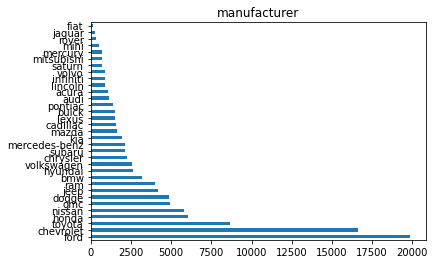

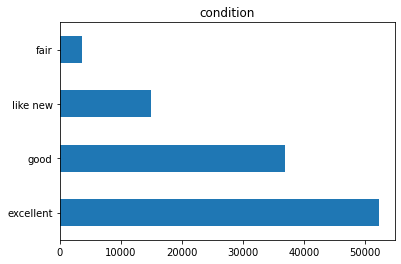

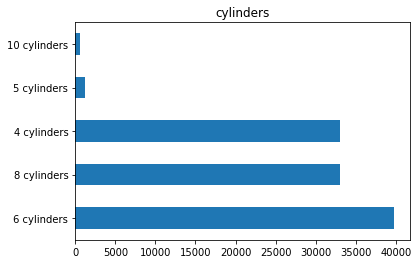

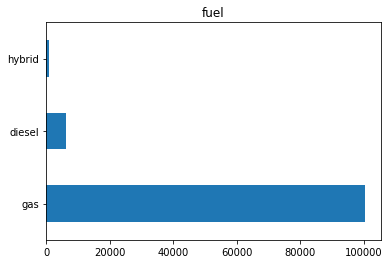

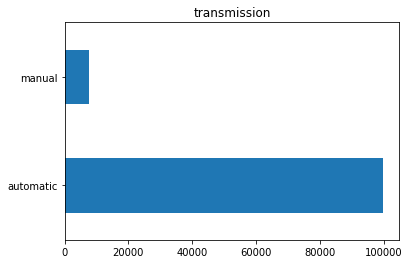

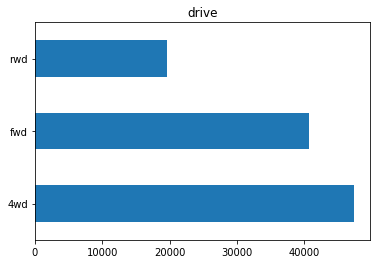

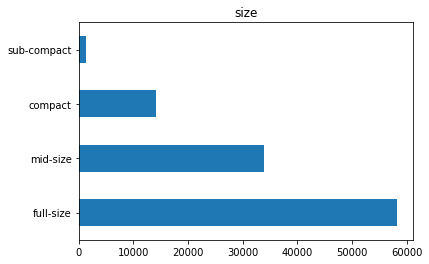

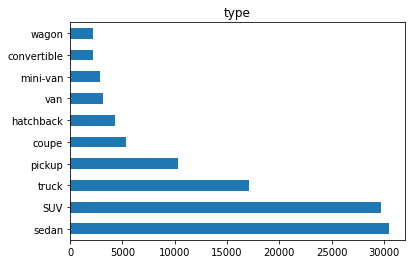

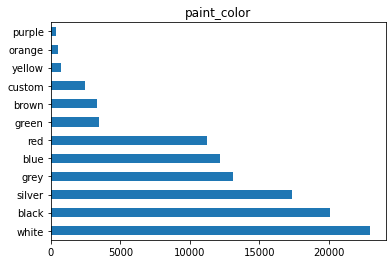

In [ ]:
for col in ds.select_dtypes(include='object').columns:
    pd.value_counts(ds[col]).plot.barh()
    plt.title(col)
    plt.show()

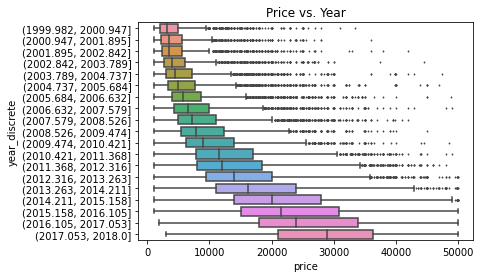

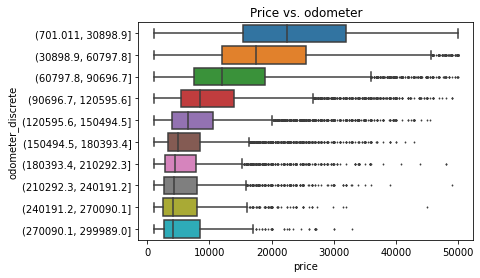

In [ ]:
plt.figure()
ds["year_discrete"] = pd.cut(ds["year"], 19)
sns.boxplot(data=ds, y="year_discrete", x="price", fliersize=1)
plt.title("Price vs. Year")

# Discretize the odometer into bins and box-plot
plt.figure()
ds["odometer_discrete"] = pd.cut(ds["odometer"], 10)
sns.boxplot(data=ds, y="odometer_discrete", x="price", fliersize=1)
plt.title("Price vs. odometer")

plt.show()


Utilizando https://scikit-learn.org/stable/index.html realice un diseño experimental programado en python que al menos abarque: (35 puntos)

Dos algoritmos de agrupamiento. Comente brevemente qué parámetros hay que configurar.
Dos métricas distintas para comparar el agrupamiento.
Al menos 5 valores del cluster. Recuerde que la cantidad de cluster a probar tiene relación con el conjunto de datos y lo que se tiene como hipótesis de lo que se desea obtener.

Preprocesamiento y escalado del dataset

In [ ]:
import sklearn.preprocessing
import sklearn.cluster
# Load the dataset
df = pd.read_csv("craigslistVehicles_2000_2018.csv", header=0)

# Encode all categorical variables
df = pd.get_dummies(df, prefix_sep="_", drop_first=False)
cols = df.columns

# Standardize the data
data_ndarray = df[cols].values.astype("float64")
scaler = sklearn.preprocessing.StandardScaler()
data_scaled_ndarray = scaler.fit_transform(data_ndarray)
data_scaled = pd.DataFrame(data_scaled_ndarray, columns = df[cols].columns)



In [ ]:
df.head()

,price,year,odometer,manufacturer_acura,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_pontiac,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo,condition_excellent,condition_fair,condition_good,condition_like new,cylinders_10 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,fuel_diesel,fuel_gas,fuel_hybrid,transmission_automatic,transmission_manual,drive_4wd,drive_fwd,drive_rwd,size_compact,size_full-size,size_mid-size,size_sub-compact,type_SUV,type_convertible,type_coupe,type_hatchback,type_mini-van,type_pickup,type_sedan,type_truck,type_van,type_wagon,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,1200,2000,190000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1250,2000,189000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1250,2000,260583,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1395,2000,198388,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1499,2000,150500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Para este experimento se utilizaran los algoritmos k mean(medidas de distancia) y Guassian Mixture (modelo probabilístico), con pruebas de clusters: k = {5,10,15…..100}. 
	
Métrica :

**Silhouette_samples:**
Es método de interpretación y validación de consistencia dentro de grupos de datos. La técnica proporciona una representación gráfica sucinta de qué tan bien se ha clasificado cada objeto. 
El valor de la silueta es una medida de cuán similar es un objeto a su propio grupo (cohesión) en comparación con otros grupos (separación). La silueta varía de −1 a +1, donde un valor alto indica que el objeto está bien emparejado con su propio grupo y mal emparejado con los grupos vecinos. Si la mayoría de los objetos tienen un valor alto, entonces la configuración de agrupamiento es apropiada. Si muchos puntos tienen un valor bajo o negativo, entonces la configuración de agrupación puede tener demasiados o muy pocos grupos.
La silueta se puede calcular con cualquier métrica de distancia, como la distancia euclidiana o la distancia de Manhattan.
https://en.wikipedia.org/wiki/Silhouette_(clustering)



Algoritmo: **KMeans** 

Utiliza medidas de distancia para agrupar

Parametros:

n_clusters: Cantidad de cluster en que se quiere agrupar el dataset.

max_iter: Maxima cantidad de iteracciones 

tol: Tolerancia relativa para considerar las convergencia del algoritmo

algorithm:  K-means a utilizar. El algoritmo clásico de estilo EM es "completo". La variación "elkan" es más eficiente mediante el uso de la desigualdad del triángulo, pero actualmente no admite datos escasos. "Auto" elige "elkan" para datos densos y "completo" para datos dispersos

Computing K-Means with 5 clusters
  Score: 7579893.762
  Avg. silhouette_score: 0.048
Computing K-Means with 10 clusters
  Score: 6967877.269
  Avg. silhouette_score: 0.045
Computing K-Means with 15 clusters
  Score: 6499732.473
  Avg. silhouette_score: 0.064
Computing K-Means with 20 clusters
  Score: 5991142.632
  Avg. silhouette_score: 0.086
Computing K-Means with 25 clusters
  Score: 5479413.217
  Avg. silhouette_score: 0.115
Computing K-Means with 30 clusters
  Score: 4964650.044
  Avg. silhouette_score: 0.156
Computing K-Means with 35 clusters
  Score: 4541033.745
  Avg. silhouette_score: 0.155
Computing K-Means with 40 clusters
  Score: 4064781.357
  Avg. silhouette_score: 0.180
Computing K-Means with 45 clusters
  Score: 3731565.202
  Avg. silhouette_score: 0.175
Computing K-Means with 50 clusters
  Score: 3568567.560
  Avg. silhouette_score: 0.170
Computing K-Means with 55 clusters
  Score: 3409085.867
  Avg. silhouette_score: 0.173
Computing K-Means with 60 clusters
  Score: 

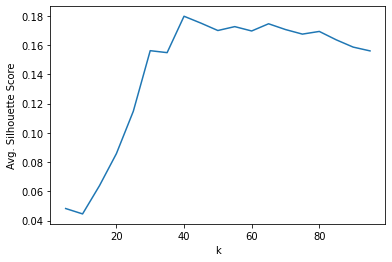

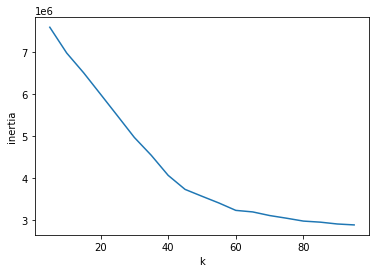

In [ ]:

avg_score_list=[]
calinski_list=[]
score_list=[]

min_k = 5
max_k = 100
k_step = 5

for n_clusters in range(min_k, max_k, k_step):

    # Do K-Means clustering
    print("Computing K-Means with {} clusters".format(n_clusters))
    kmeans = sklearn.cluster.KMeans(n_clusters=n_clusters)  
    kmeans.fit(data_scaled)
    labels = kmeans.labels_

    # Compute the average silhouette score
    #print("Computing silhouette scores")

    score= kmeans.inertia_
    
    print("  Score: {:.3f}".format(score))
    score_list.append(score)

    # Pick a random subset of the data
    subset_len = 10000

    total_len = data_scaled.shape[0]
    reorder_map = np.random.permutation(total_len)
    subset_map = reorder_map[0:subset_len]

    # Compute the silhouette scores for each sample
    silhouette_values = sklearn.metrics.silhouette_samples(data_scaled.iloc[subset_map], labels[subset_map])

    # For each cluster, compute the mean of its silhouette scores
    for idx in range(n_clusters):

        # Create a subset of the data limited to this cluster
        silhouette_values_this_cluster = silhouette_values[labels[subset_map]==idx]

        # Print the average score for this cluster
        #print("Cluster {}: Avg. Silhouette score: {:.3f}".format(idx, silhouette_values_this_cluster.mean()))

    print("  Avg. silhouette_score: {:.3f}".format(silhouette_values.mean()))
    avg_score_list.append(silhouette_values.mean())

k_list = [x for x in range(min_k, max_k, k_step)]
plt.plot(k_list, avg_score_list)
plt.xlabel("k")
plt.ylabel("Avg. Silhouette Score")
plt.show()


k_list = [x for x in range(min_k, max_k, k_step)]
plt.plot(k_list, score_list)
plt.xlabel("k")
plt.ylabel("inertia")
plt.show()



Tanto el silhouette como el intertia(elbow) muestra un valor optimo en 40 clusters.

Proyeccion en 2D de los 40 clusters generados por k-means


Computing K-Means with 40 clusters
Computing t-SNE reduction to 2 dimensions


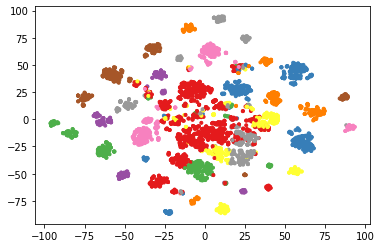

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
import sklearn.cluster

# Load the dataset
df = pd.read_csv("craigslistVehicles_2000_2018.csv", header=0)

# Encode all categorical variables
df = pd.get_dummies(df, prefix_sep="_", drop_first=False)
cols = df.columns

# Standardize the data
data_ndarray = df[cols].values.astype("float64")
scaler = sklearn.preprocessing.StandardScaler()
data_scaled_ndarray = scaler.fit_transform(data_ndarray)
data_scaled = pd.DataFrame(data_scaled_ndarray, columns = df[cols].columns)

# Do K-Means clustering
n_clusters = 40
print("Computing K-Means with {} clusters".format(n_clusters))
kmeans = sklearn.cluster.KMeans(n_clusters=n_clusters)  
kmeans.fit(data_scaled)

# Compute the t-SNE transformation into 2 dimensions
# Do it over a random subset
subset_len = 5000
total_len = df.shape[0]
reorder_map = np.random.permutation(total_len)
subset_map = reorder_map[0:subset_len]
subset_data = data_scaled.iloc[subset_map]

print("Computing t-SNE reduction to 2 dimensions")
tsne = sklearn.manifold.TSNE(n_components=2)
data_2d = tsne.fit_transform(subset_data)

# Plot a scatterplot of the two transformed components
# With color markers corresponding to the clusters
plt.scatter(data_2d[:,0], data_2d[:,1], c=kmeans.labels_[subset_map], cmap="Set1", marker=".")
plt.show()



Exploracion de los principales cluster generados por Kmeans

Computing K-Means with 40 clusters
Avg. silhouette_score: 0.186
Top clusters:
Cluster 27  Score: 0.678
  Number of samples:  867


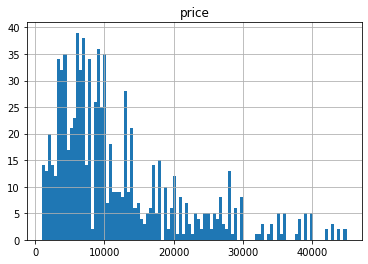

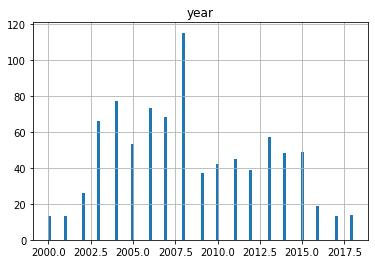

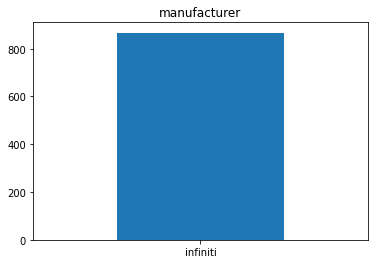

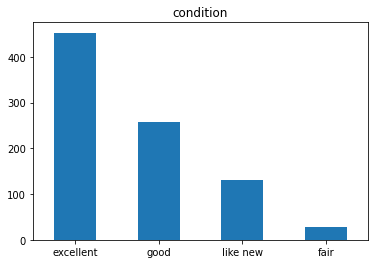

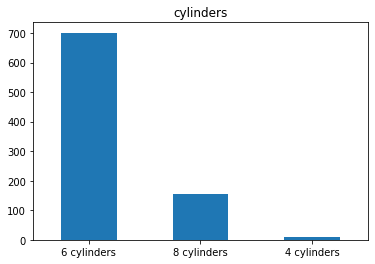

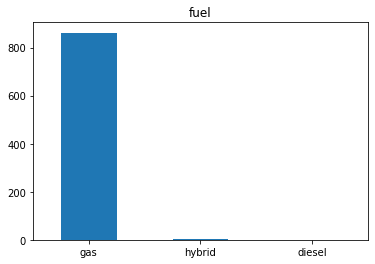

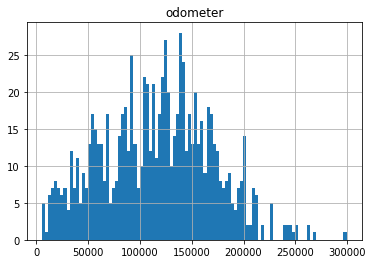

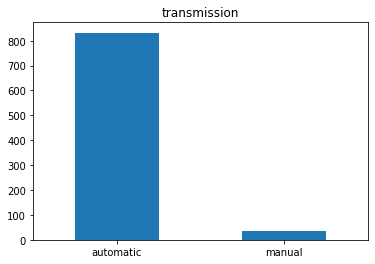

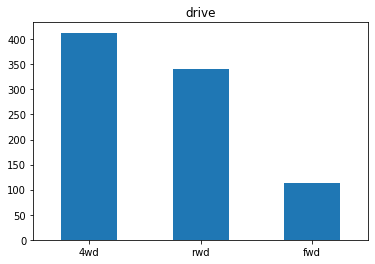

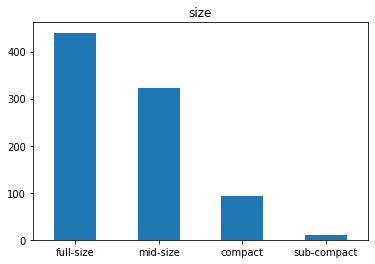

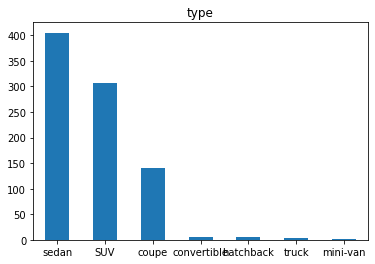

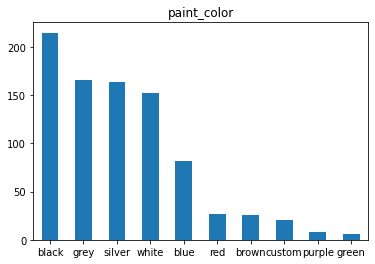

Cluster 20  Score: 0.623
  Number of samples:  11291


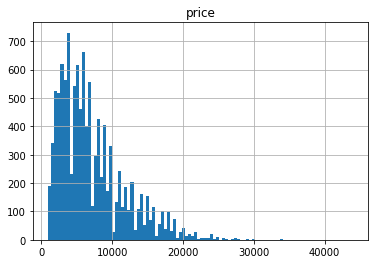

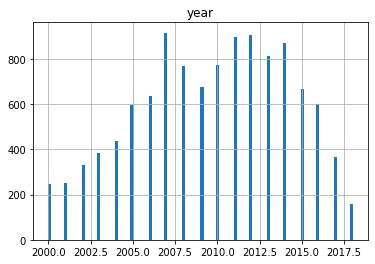

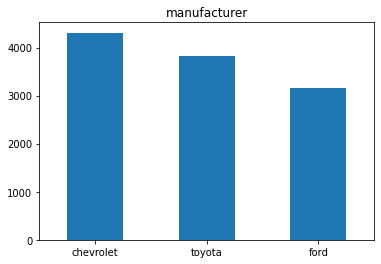

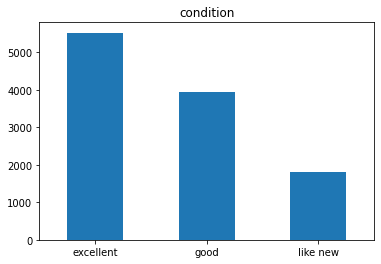

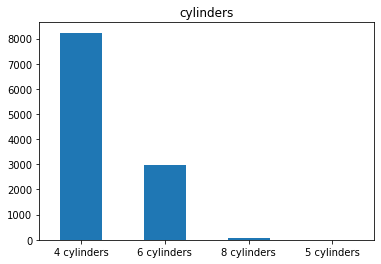

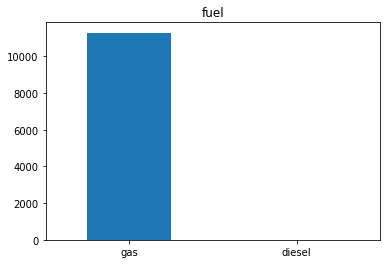

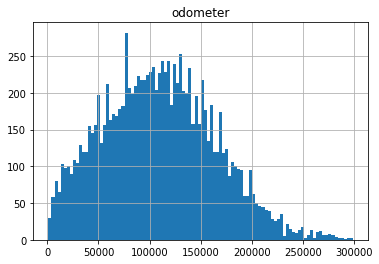

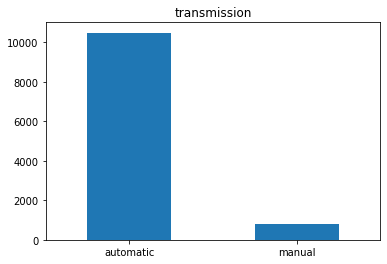

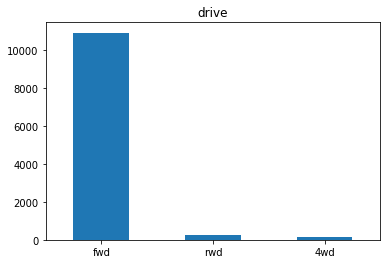

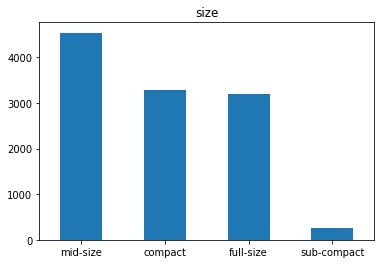

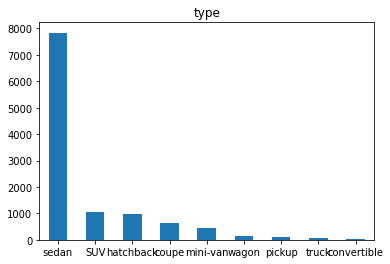

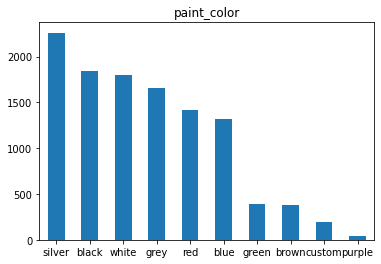

Cluster 25  Score: 0.617
  Number of samples:  3990


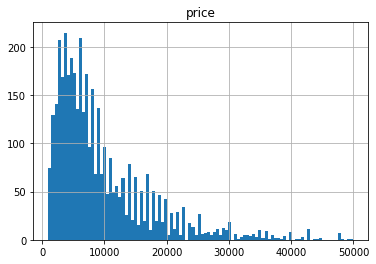

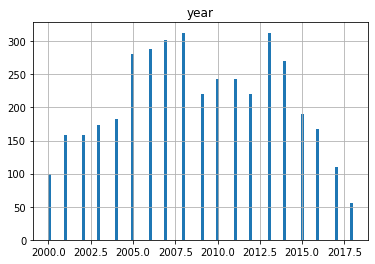

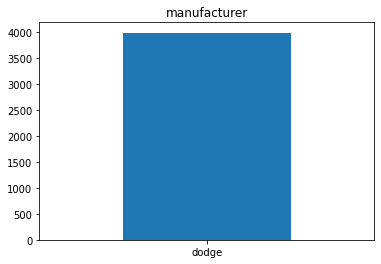

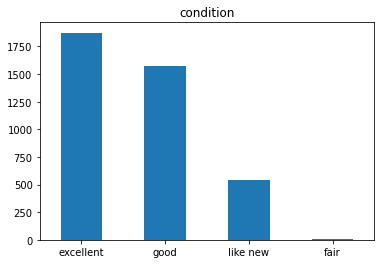

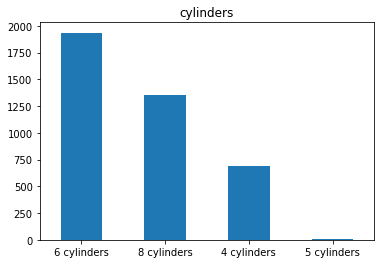

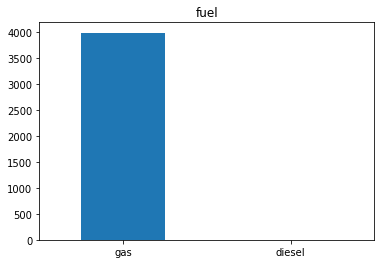

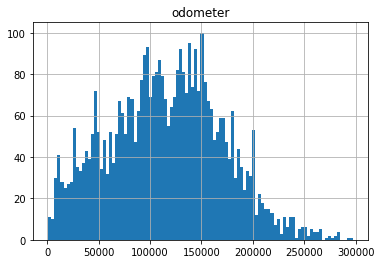

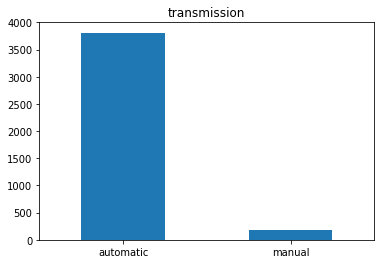

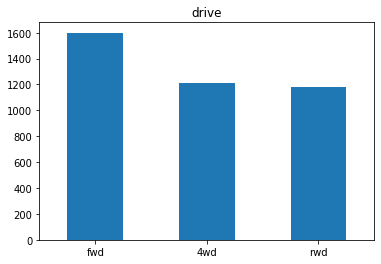

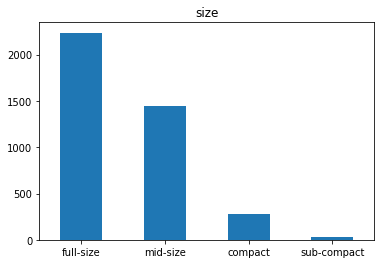

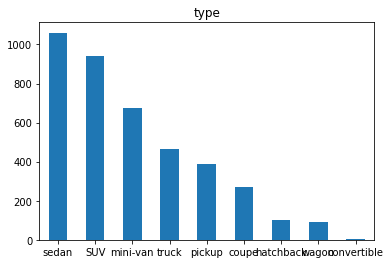

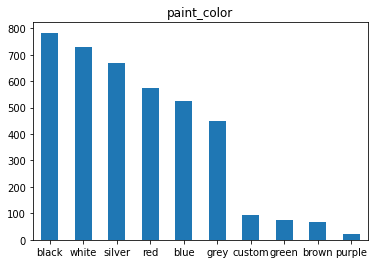

Cluster 24  Score: 0.511
  Number of samples:  2107


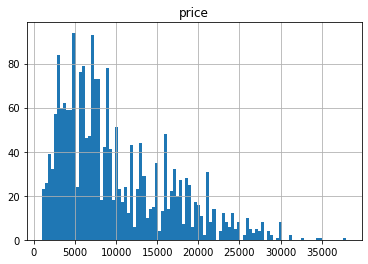

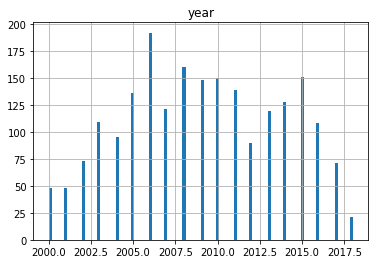

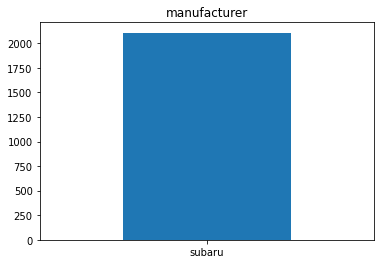

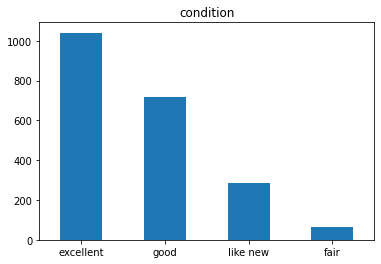

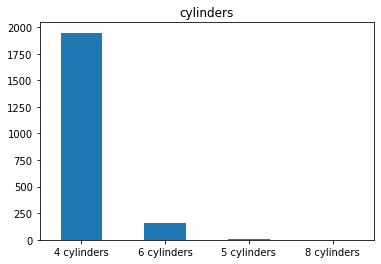

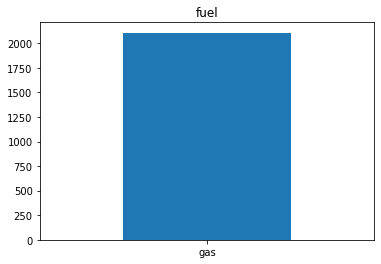

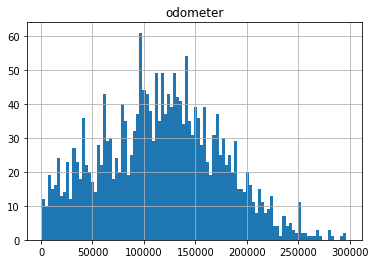

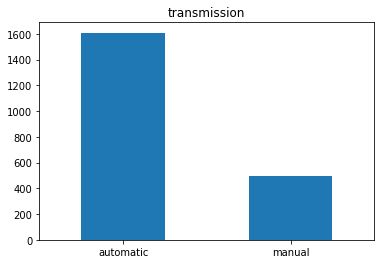

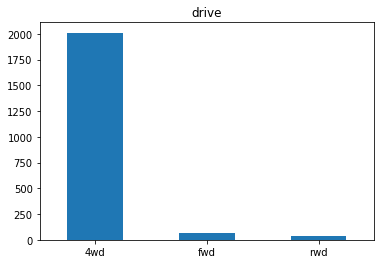

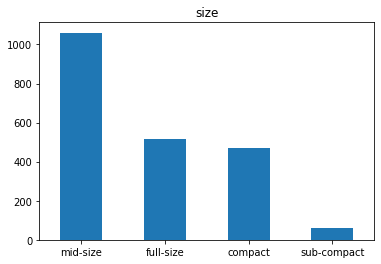

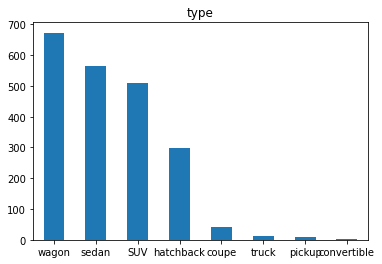

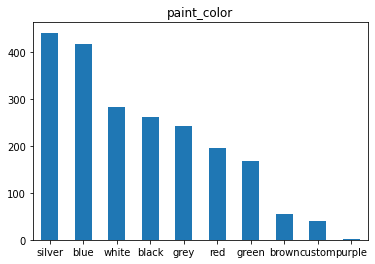

Cluster 11  Score: 0.477
  Number of samples:  4261


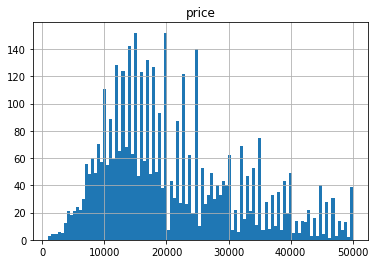

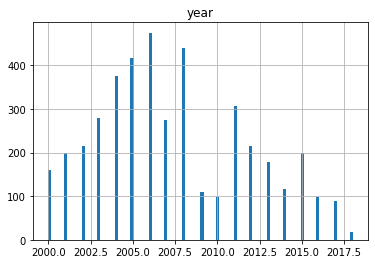

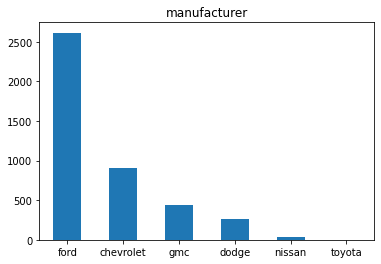

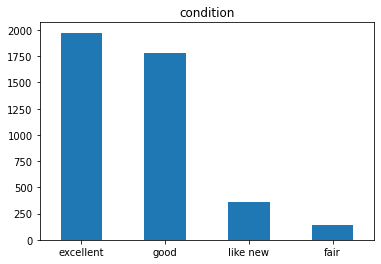

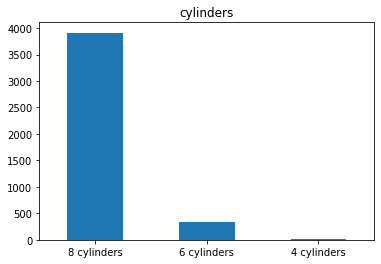

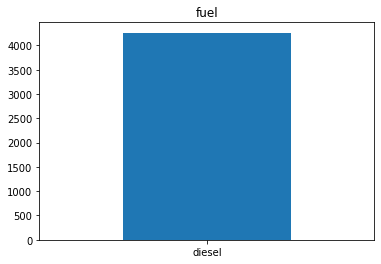

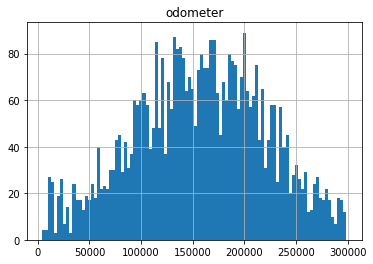

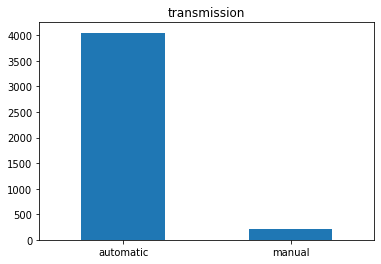

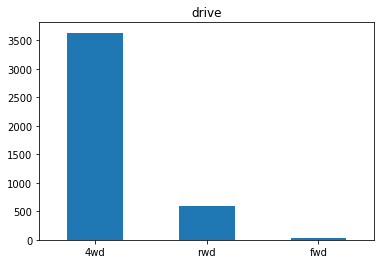

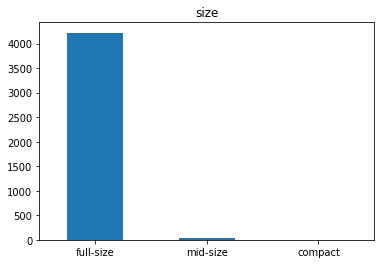

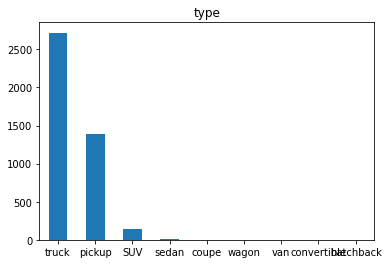

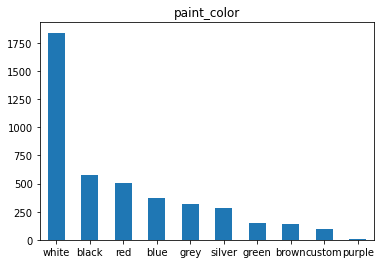

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
import sklearn.cluster

# Load the dataset
df = pd.read_csv("craigslistVehicles_2000_2018.csv", header=0)
df_original = df

# Encode all categorical variables
df = pd.get_dummies(df, prefix_sep="_", drop_first=False)
cols = df.columns

# Standardize the data
data_ndarray = df[cols].values.astype("float64")
scaler = sklearn.preprocessing.StandardScaler()
data_scaled_ndarray = scaler.fit_transform(data_ndarray)
data_scaled = pd.DataFrame(data_scaled_ndarray, columns = df[cols].columns)

# Do K-Means clustering
n_clusters = 40
print("Computing K-Means with {} clusters".format(n_clusters))
kmeans = sklearn.cluster.KMeans(n_clusters=n_clusters)  
kmeans.fit(data_scaled)
labels = kmeans.labels_

# Pick a random subset of the data
subset_len = 10000
total_len = data_scaled.shape[0]
reorder_map = np.random.permutation(total_len)
subset_map = reorder_map[0:subset_len]

# Compute the silhouette scores for each sample
silhouette_values = sklearn.metrics.silhouette_samples(data_scaled.iloc[subset_map], labels[subset_map])

# For each cluster, compute the mean of its silhouette scores
silhouette_avg_per_cluster = []
for idx in range(n_clusters):

    # Create a subset of the data limited to this cluster
    silhouette_values_this_cluster = silhouette_values[labels[subset_map]==idx]

    # Print the average score for this cluster
    #print("Cluster {}: Avg. Silhouette score: {:.3f}".format(idx, silhouette_values_this_cluster.mean()))
    silhouette_avg_per_cluster.append(silhouette_values_this_cluster.mean())
print("Avg. silhouette_score: {:.3f}".format(silhouette_values.mean()))

# Sort the clusters by silhouette score
cluster_score_plus_score = [(silhouette_avg_per_cluster[i],i) for i in range(n_clusters)]
cluster_score_plus_score.sort(reverse=True)
print("Top clusters:")
for idx in range(5):
    print("Cluster {}  Score: {:.3f}".format(cluster_score_plus_score[idx][1], cluster_score_plus_score[idx][0]))

    # Get a subset of the original data, limited to this cluster
    data_this_cluster = df_original[labels==idx]
    print("  Number of samples: ", data_this_cluster.shape[0])

    for col in data_this_cluster.columns:
        if data_this_cluster[col].dtype == "object":
            # If categorical, do a count bar plot
            plt.figure()
            lm = pd.value_counts(data_this_cluster[col]).plot.bar()
            lm.set_xticklabels(lm.get_xticklabels(),rotation=0)
            plt.title(col)
            #plt.show()

        else:
            # If numerical, do a histogram
            data_this_cluster.hist(column=col, bins=100)
            plt.title(col)
            #plt.show()
    plt.show()



Algoritmo: **GaussianMixture** 

Utiliza medidas de probabilidad para generar los cluster

Parametros:

n_components: Cantidad de cluster en que se quiere agrupar el dataset.

tol: Umbral de Tolerancia  para considerar las convergencia del algoritmo


covariance_type : ‘full’ (default), ‘tied’, ‘diag’, ‘spherical’

Este parametro es importante, es utlizado para seleccionar el tipo de figura utilizado para agrupar, Full: cada cluster tendra su propia figura, es mas caro de computar

max_iter :  Numero maximo de iteracciones

Metricas utilizadas: Silhouette_samples,BIC, AIC

BIC: Bayesian information criterion

Tanto BIC como AIC intentan resolver el problema del número optimo de parametros introduciendo un término de penalización para la cantidad de parámetros en el modelo; El plazo de penalización es mayor en BIC que en AIC. Se prefiere el modelo con el BIC más bajo, BIC castigara los modelos con mayor numeros de clsuterd


Computing GaussianMixture with 5 clusters
  aic: -24962409.583
  bic: -24807107.771
  Avg. silhouette_score: 0.071
Computing GaussianMixture with 10 clusters
  aic: -30589889.620
  bic: -30279276.408
  Avg. silhouette_score: 0.024
Computing GaussianMixture with 15 clusters
  aic: -39312333.318
  bic: -38846408.706
  Avg. silhouette_score: 0.036
Computing GaussianMixture with 20 clusters
  aic: -45601400.910
  bic: -44980164.899
  Avg. silhouette_score: 0.075
Computing GaussianMixture with 25 clusters
  aic: -47373169.102
  bic: -46596621.691
  Avg. silhouette_score: 0.092
Computing GaussianMixture with 30 clusters
  aic: -51568621.475
  bic: -50636762.664
  Avg. silhouette_score: 0.127
Computing GaussianMixture with 35 clusters
  aic: -50936481.491
  bic: -49849311.281
  Avg. silhouette_score: 0.159
Computing GaussianMixture with 40 clusters
  aic: -55768036.140
  bic: -54525554.530
  Avg. silhouette_score: 0.147
Computing GaussianMixture with 45 clusters
  aic: -55270655.738
  bic: -5

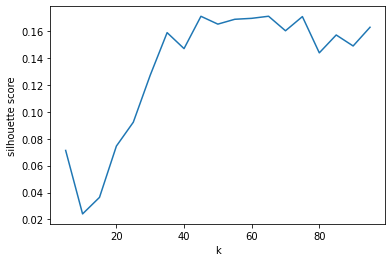

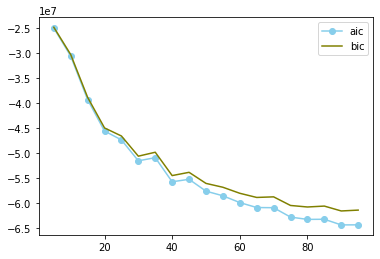

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
import sklearn.cluster
from sklearn.mixture import GaussianMixture

# Load the dataset
df = pd.read_csv("craigslistVehicles_2000_2018.csv", header=0)

# Encode all categorical variables
df = pd.get_dummies(df, prefix_sep="_", drop_first=False)
cols = df.columns

# Standardize the data
data_ndarray = df[cols].values.astype("float64")
scaler = sklearn.preprocessing.StandardScaler()
data_scaled_ndarray = scaler.fit_transform(data_ndarray)
data_scaled = pd.DataFrame(data_scaled_ndarray, columns = df[cols].columns)

avg_score_list=[]
aic_list=[]
bic_list=[]

min_k = 5
max_k = 100
k_step = 5

for n_clusters in range(min_k, max_k, k_step):

    # Do GaussianMixture clustering
    print("Computing GaussianMixture with {} clusters".format(n_clusters))
    model = GaussianMixture(n_components=n_clusters)  
    model.fit(data_scaled)
    labels = model.predict(data_scaled)

    aic=model.aic(data_scaled)
    bic=model.bic(data_scaled)

    aic_list.append(aic)
    bic_list.append(bic)

    print("  aic: {:.3f}".format(aic))
    print("  bic: {:.3f}".format(bic))

    # Pick a random subset of the data
    subset_len = 10000

    total_len = data_scaled.shape[0]
    reorder_map = np.random.permutation(total_len)
    subset_map = reorder_map[0:subset_len]

    # Compute the silhouette scores for each sample
    silhouette_values = sklearn.metrics.silhouette_samples(data_scaled.iloc[subset_map], labels[subset_map])

    # For each cluster, compute the mean of its silhouette scores
    for idx in range(n_clusters):
        # Create a subset of the data limited to this cluster
        silhouette_values_this_cluster = silhouette_values[labels[subset_map]==idx]

    print("  Avg. silhouette_score: {:.3f}".format(silhouette_values.mean()))
    avg_score_list.append(silhouette_values.mean())

k_list = [x for x in range(min_k, max_k, k_step)]
plt.plot(k_list, avg_score_list)
plt.xlabel("k")
plt.ylabel("silhouette score")
plt.show()

plt.plot( k_list, aic_list, marker='o',label = "aic",  color='skyblue')
plt.plot( k_list, bic_list, marker='',label = "bic", color='olive', )
plt.legend()
plt.show()

La mertrica silhouette muestra un optimo alrededor de 45 grupos.

AIC y BIC bajan escalonadamente hasta el valor k aproximado a 45-50, después de estos valores el descenso de ambas métricas es bastante suave.


Tanto Gaussian mixture como k-means convergieron  en un valor de K muy parecido 40-45 




**Proyeccion en 2D de gaussian mixture con 45 clusters**

Computing GaussianMixture with 45 clusters
Computing t-SNE reduction to 2 dimensions


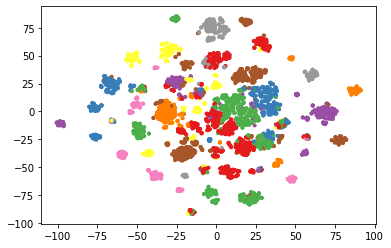

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
import sklearn.cluster
from sklearn.mixture import GaussianMixture

# Load the dataset
df = pd.read_csv("craigslistVehicles_2000_2018.csv", header=0)

# Encode all categorical variables
df = pd.get_dummies(df, prefix_sep="_", drop_first=False)
cols = df.columns

# Standardize the data
data_ndarray = df[cols].values.astype("float64")
scaler = sklearn.preprocessing.StandardScaler()
data_scaled_ndarray = scaler.fit_transform(data_ndarray)
data_scaled = pd.DataFrame(data_scaled_ndarray, columns = df[cols].columns)

# Do K-Means clustering
n_clusters = 45
print("Computing GaussianMixture with {} clusters".format(n_clusters))

model = GaussianMixture(n_components=n_clusters)  
model.fit(data_scaled)# Compute the t-SNE transformation into 2 dimensions

labels = model.predict(data_scaled)

# Do it over a random subset
subset_len = 5000
total_len = df.shape[0]
reorder_map = np.random.permutation(total_len)
subset_map = reorder_map[0:subset_len]
subset_data = data_scaled.iloc[subset_map]

print("Computing t-SNE reduction to 2 dimensions")
tsne = sklearn.manifold.TSNE(n_components=2)
data_2d = tsne.fit_transform(subset_data)

# Plot a scatterplot of the two transformed components
# With color markers corresponding to the clusters
plt.scatter(data_2d[:,0], data_2d[:,1], c=labels[subset_map], cmap="Set1", marker=".")
plt.show()




**Exploración de los principales clusters generado por Gaussian mixture**

Computing GaussianMixture with 45 clusters
Avg. silhouette_score: 0.155
Top clusters:
Cluster 9  Score: 0.678
  Number of samples:  2157


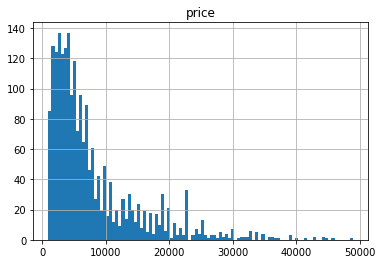

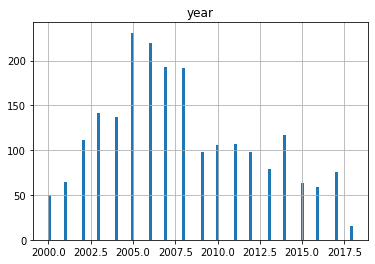

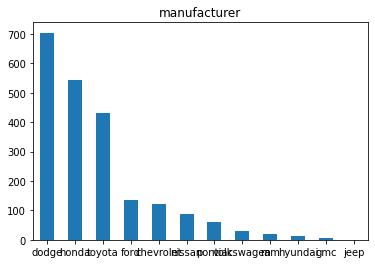

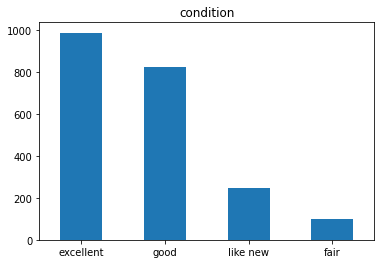

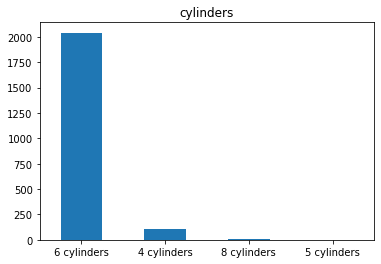

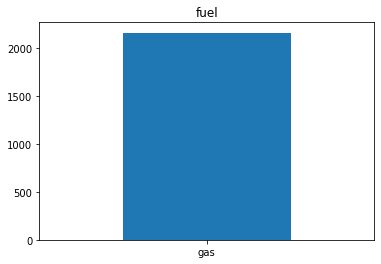

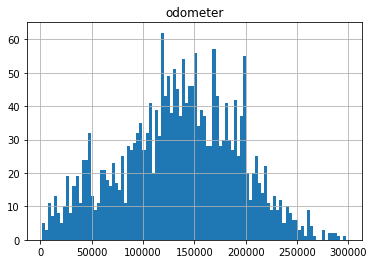

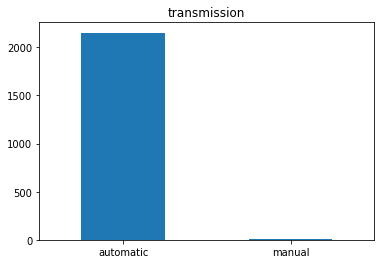

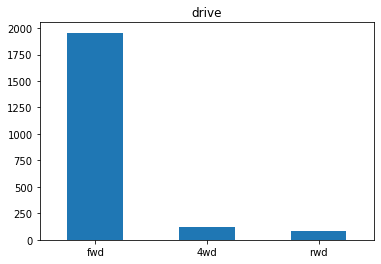

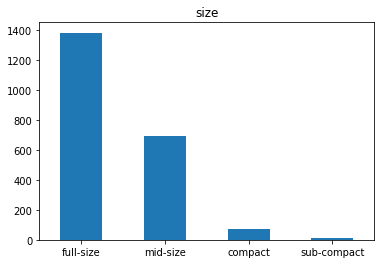

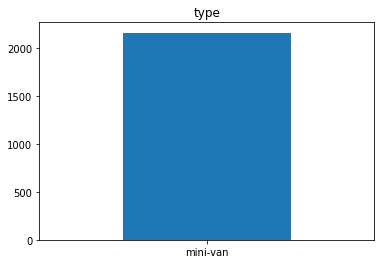

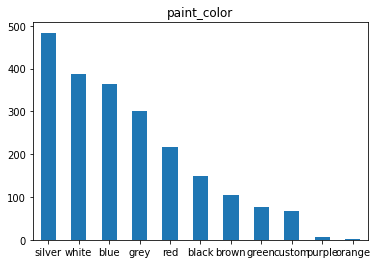

Cluster 35  Score: 0.638
  Number of samples:  19245


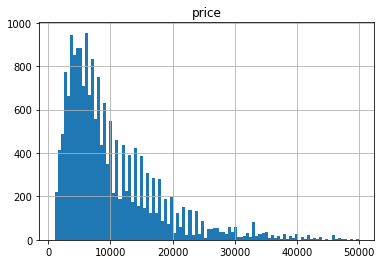

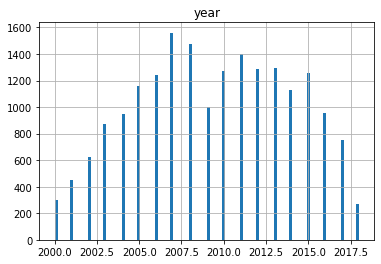

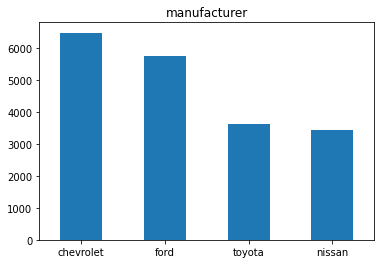

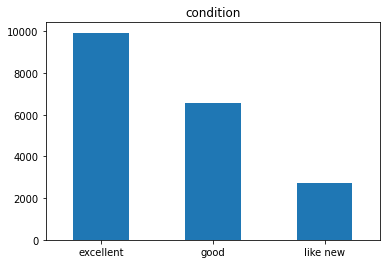

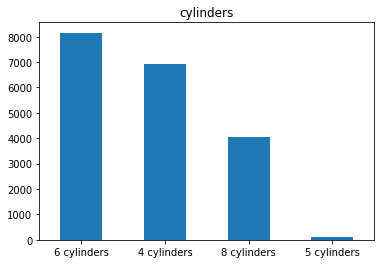

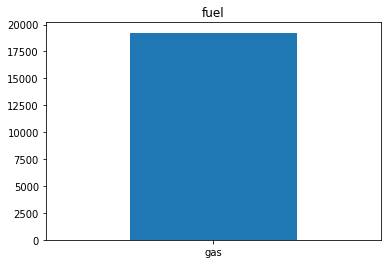

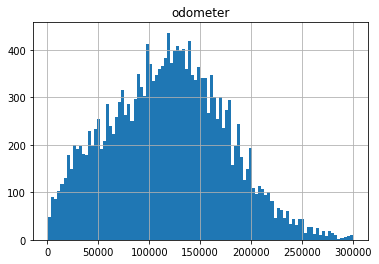

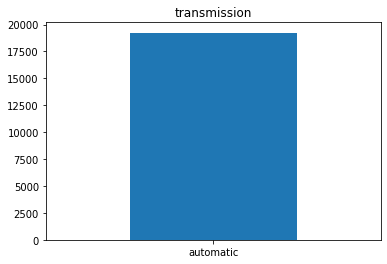

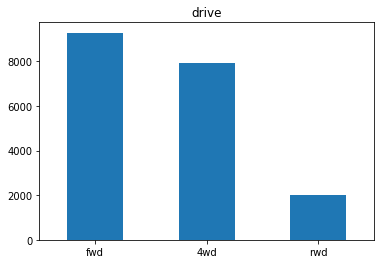

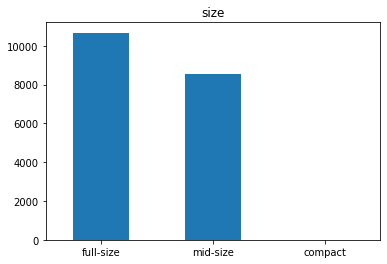

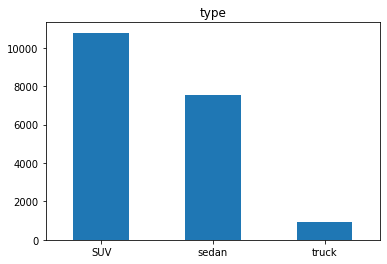

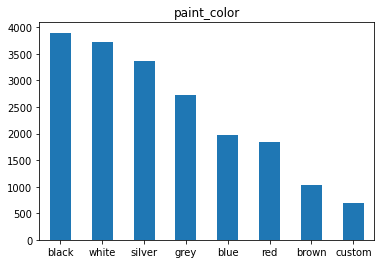

Cluster 13  Score: 0.484
  Number of samples:  7688


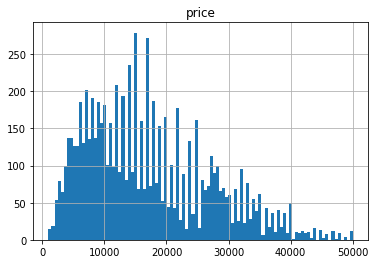

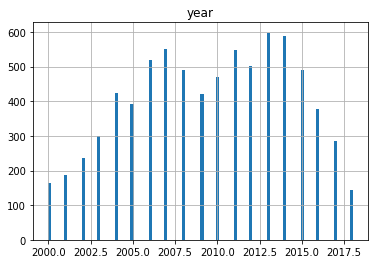

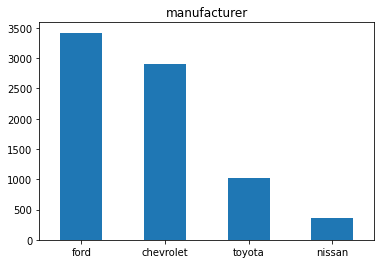

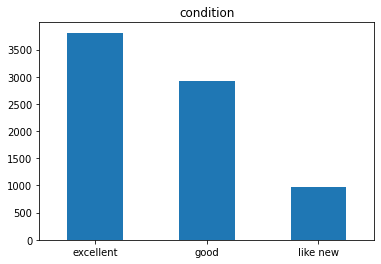

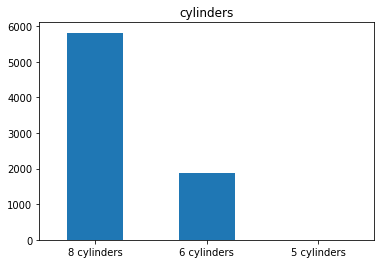

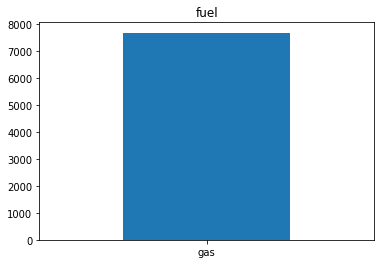

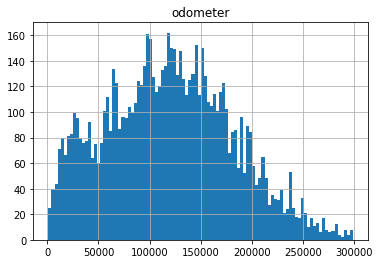

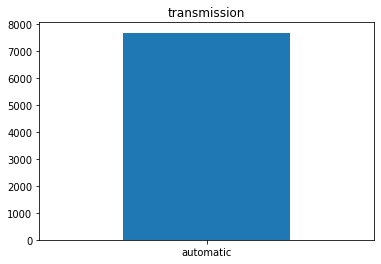

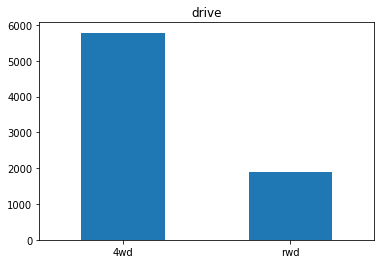

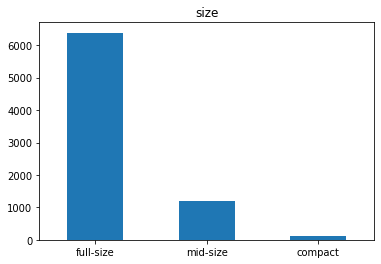

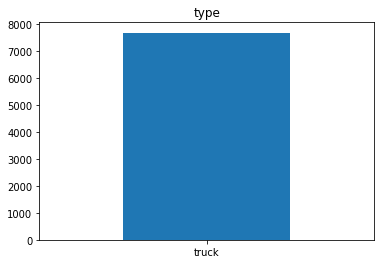

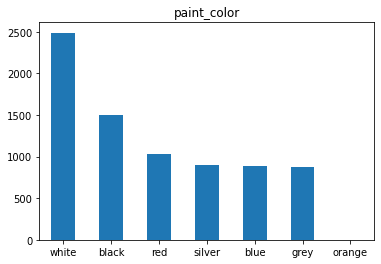

Cluster 33  Score: 0.474
  Number of samples:  683


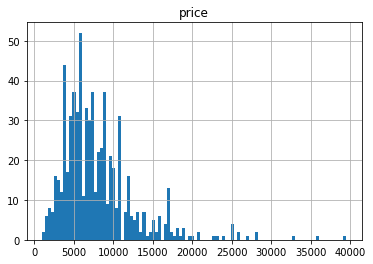

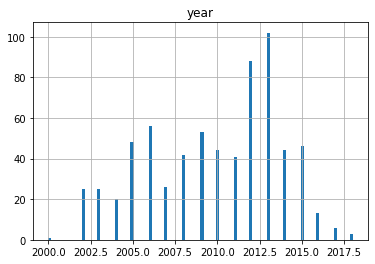

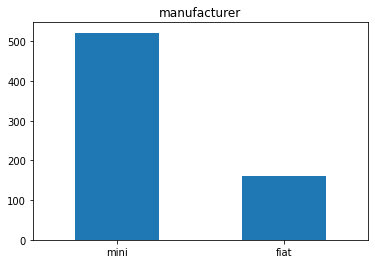

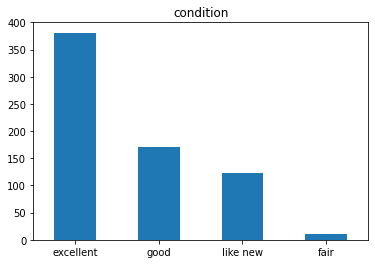

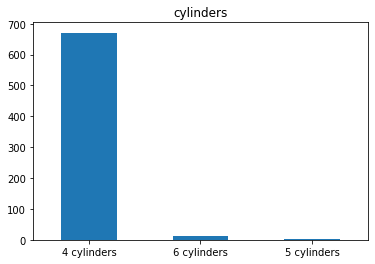

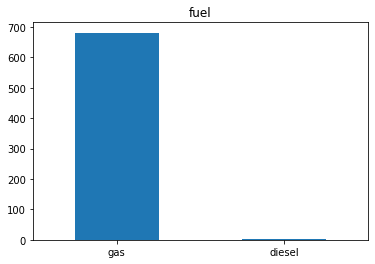

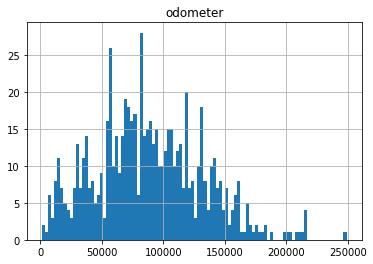

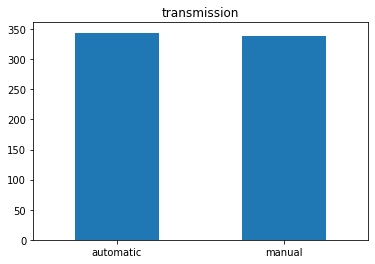

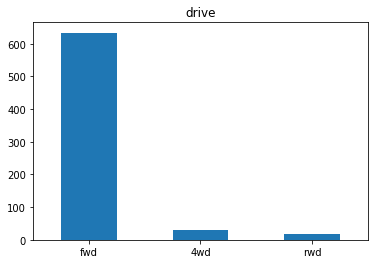

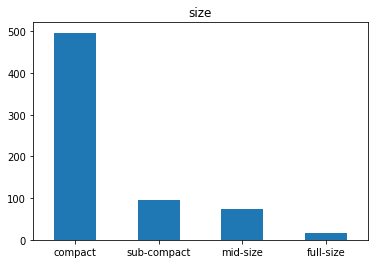

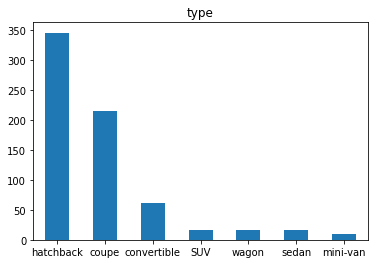

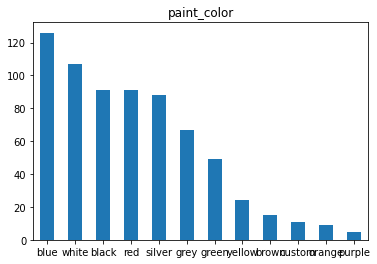

Cluster 22  Score: 0.440
  Number of samples:  2924


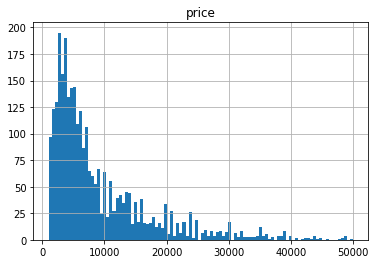

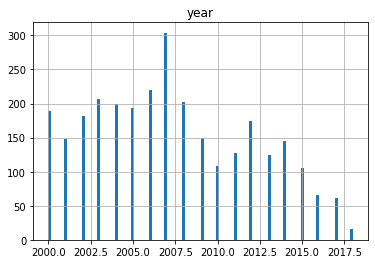

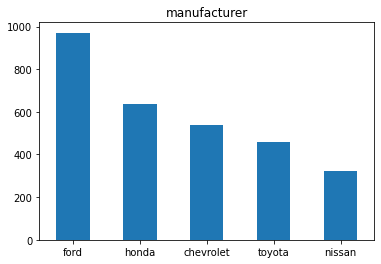

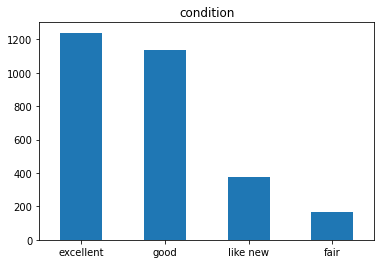

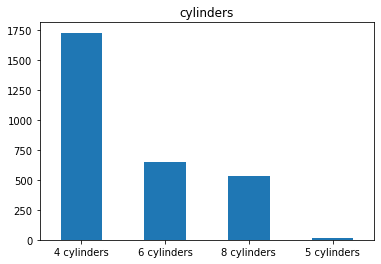

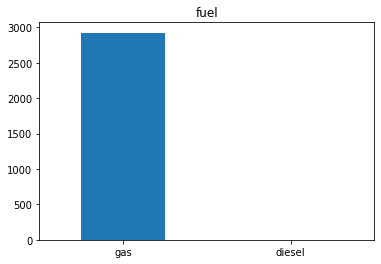

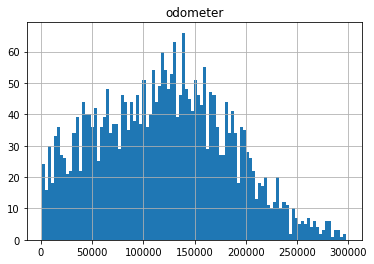

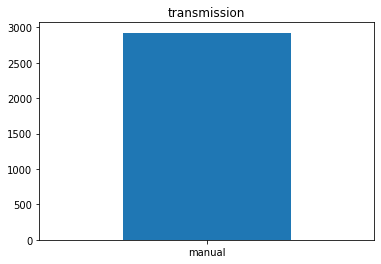

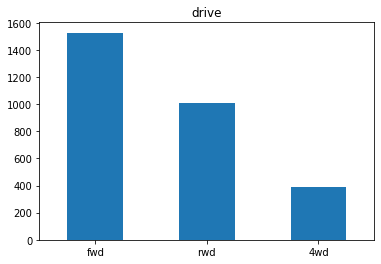

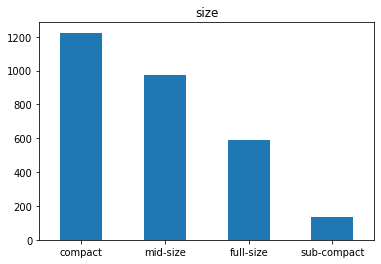

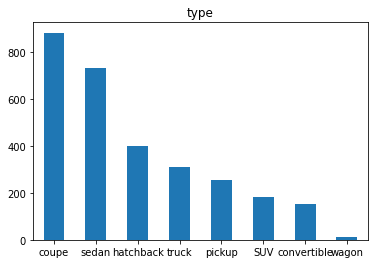

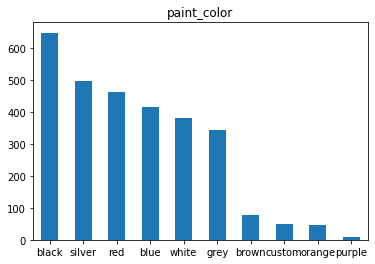

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
import sklearn.cluster
from sklearn.mixture import GaussianMixture

# Load the dataset
df = pd.read_csv("craigslistVehicles_2000_2018.csv", header=0)
df_original = df

# Encode all categorical variables
df = pd.get_dummies(df, prefix_sep="_", drop_first=False)
cols = df.columns

# Standardize the data
data_ndarray = df[cols].values.astype("float64")
scaler = sklearn.preprocessing.StandardScaler()
data_scaled_ndarray = scaler.fit_transform(data_ndarray)
data_scaled = pd.DataFrame(data_scaled_ndarray, columns = df[cols].columns)

# Do GaussianMixture clustering
n_clusters = 45
print("Computing GaussianMixture with {} clusters".format(n_clusters))

model = GaussianMixture(n_components=n_clusters)  
model.fit(data_scaled)# Compute the t-SNE transformation into 2 dimensions

labels = model.predict(data_scaled)

# Pick a random subset of the data
subset_len = 10000
total_len = data_scaled.shape[0]
reorder_map = np.random.permutation(total_len)
subset_map = reorder_map[0:subset_len]

# Compute the silhouette scores for each sample
silhouette_values = sklearn.metrics.silhouette_samples(data_scaled.iloc[subset_map], labels[subset_map])

# For each cluster, compute the mean of its silhouette scores
silhouette_avg_per_cluster = []
for idx in range(n_clusters):

    # Create a subset of the data limited to this cluster
    silhouette_values_this_cluster = silhouette_values[labels[subset_map]==idx]

    # Print the average score for this cluster
    #print("Cluster {}: Avg. Silhouette score: {:.3f}".format(idx, silhouette_values_this_cluster.mean()))
    silhouette_avg_per_cluster.append(silhouette_values_this_cluster.mean())
print("Avg. silhouette_score: {:.3f}".format(silhouette_values.mean()))

# Sort the clusters by silhouette score
cluster_score_plus_score = [(silhouette_avg_per_cluster[i],i) for i in range(n_clusters)]
cluster_score_plus_score.sort(reverse=True)
print("Top clusters:")
for idx in range(5):
    print("Cluster {}  Score: {:.3f}".format(cluster_score_plus_score[idx][1], cluster_score_plus_score[idx][0]))

    # Get a subset of the original data, limited to this cluster
    data_this_cluster = df_original[labels==idx]
    print("  Number of samples: ", data_this_cluster.shape[0])

    for col in data_this_cluster.columns:
        if data_this_cluster[col].dtype == "object":
            # If categorical, do a count bar plot
            plt.figure()
            lm = pd.value_counts(data_this_cluster[col]).plot.bar()
            lm.set_xticklabels(lm.get_xticklabels(),rotation=0)
            plt.title(col)
            #plt.show()

        else:
            # If numerical, do a histogram
            data_this_cluster.hist(column=col, bins=100)
            plt.title(col)
            #plt.show()
    plt.show()

**(2.3) Finalmente muestre una tabla resumen de los resultados y presente una seccción donde los interpreta.**

**Tabla de metricas**

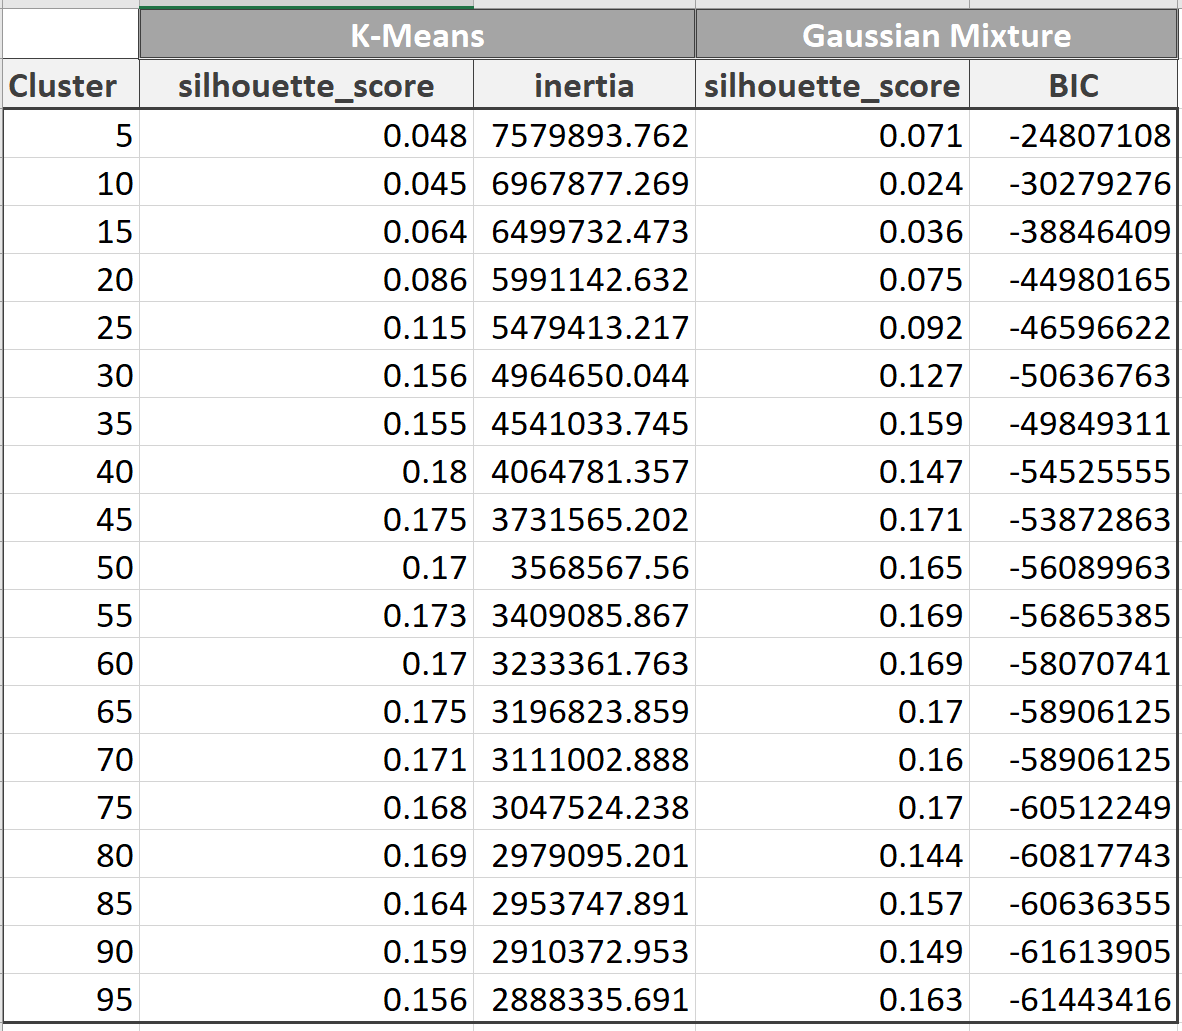

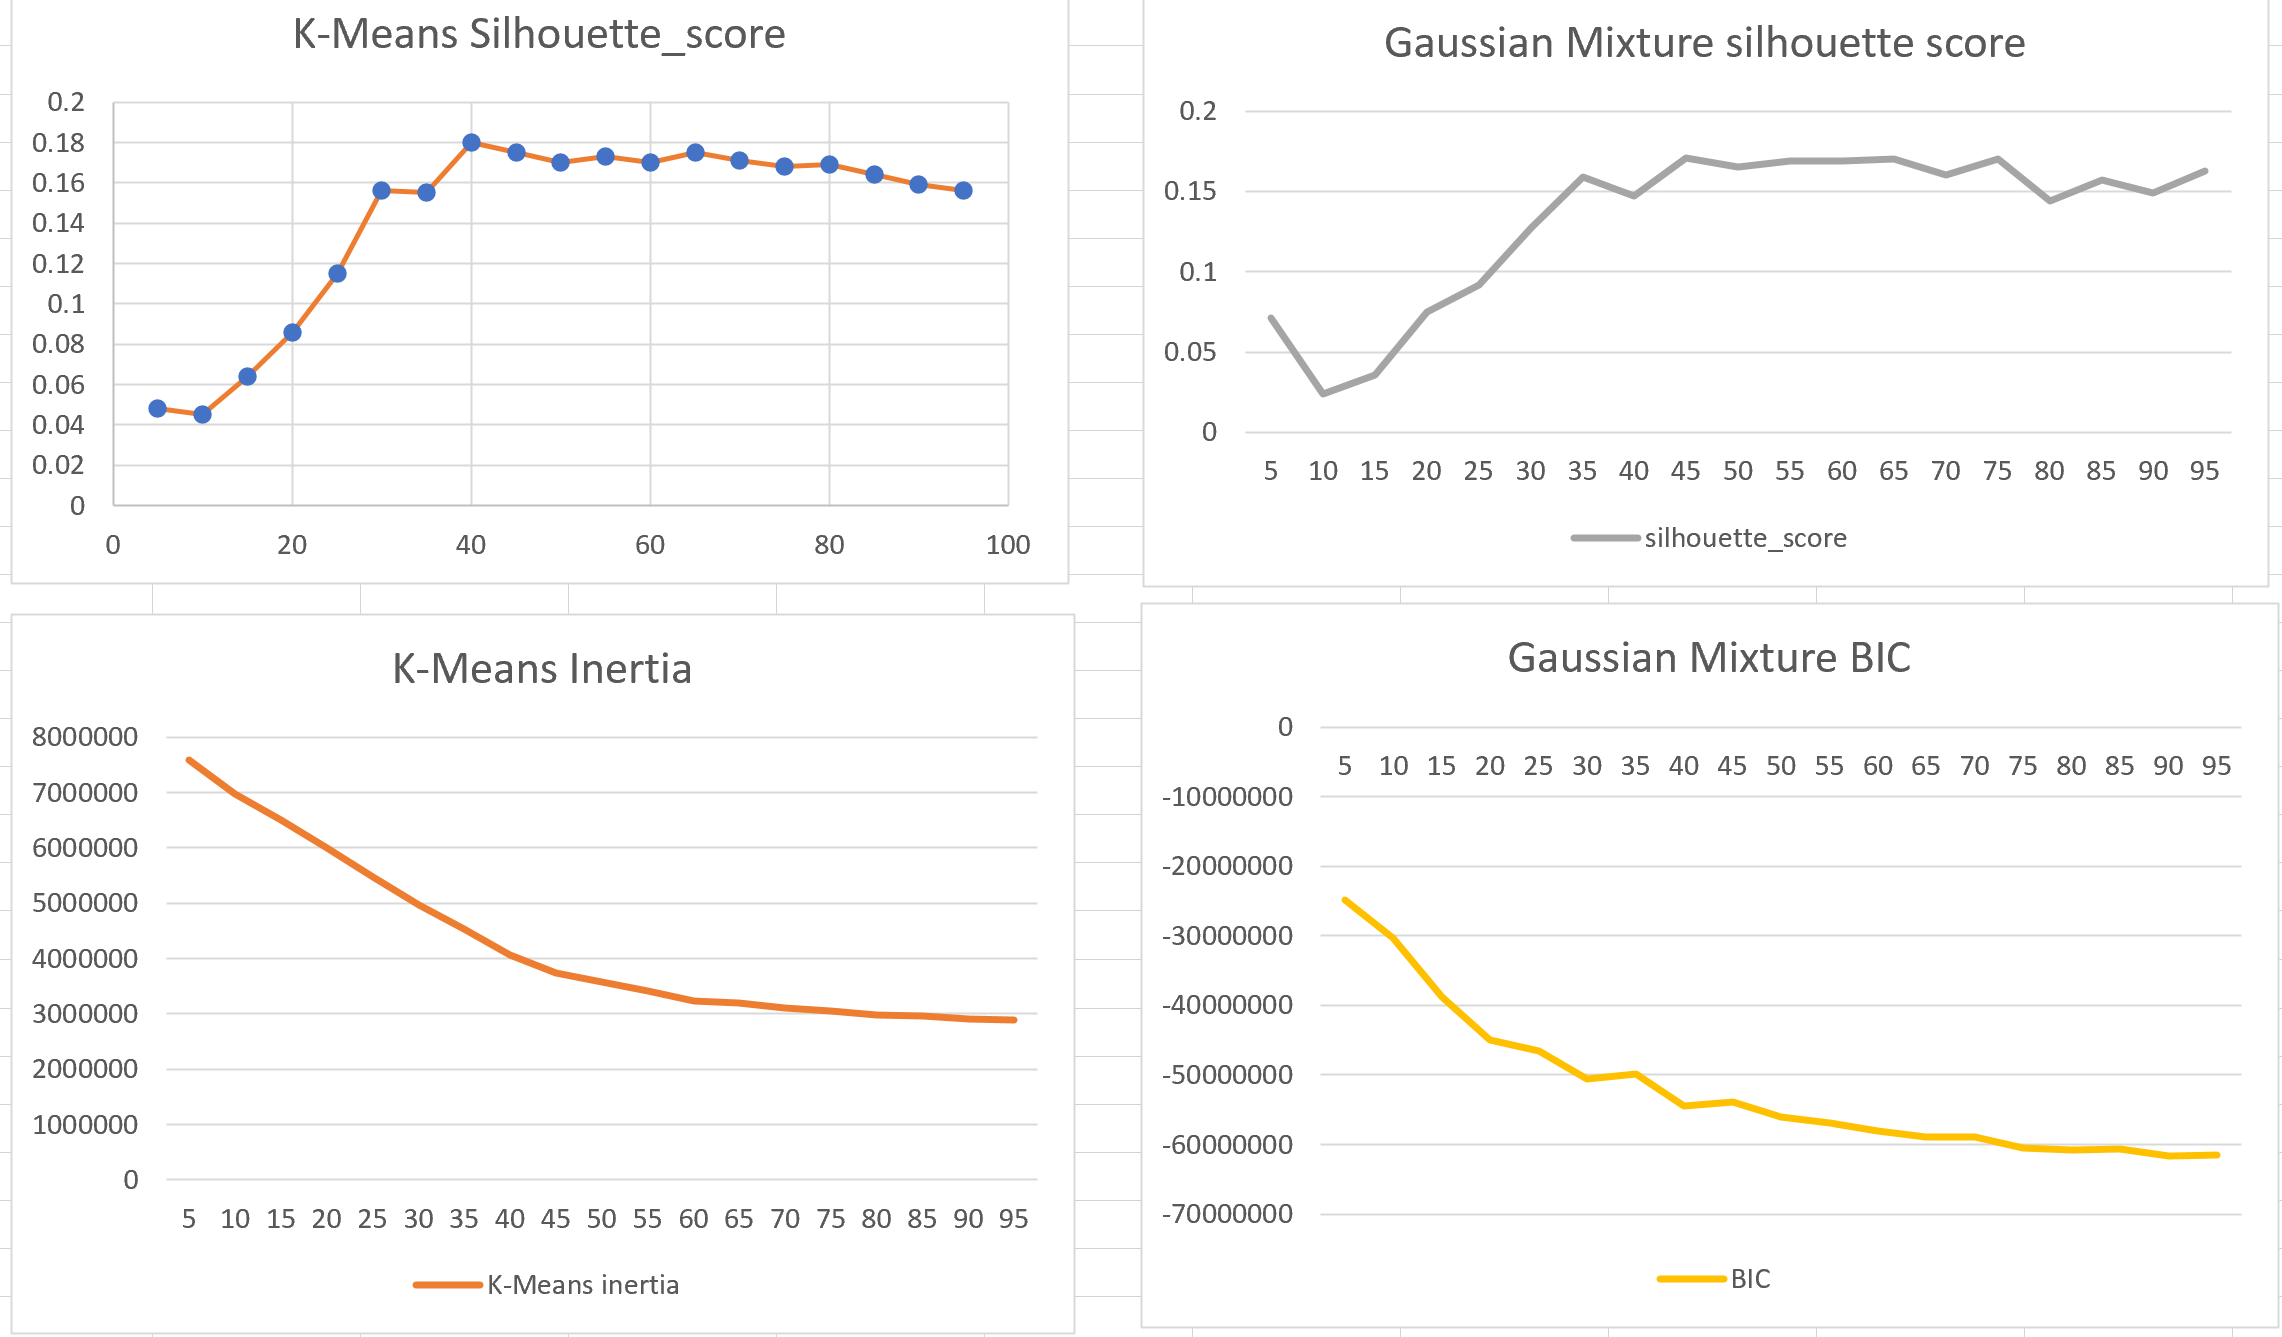

**Ejemplos de clusters generados por los algoritmos**

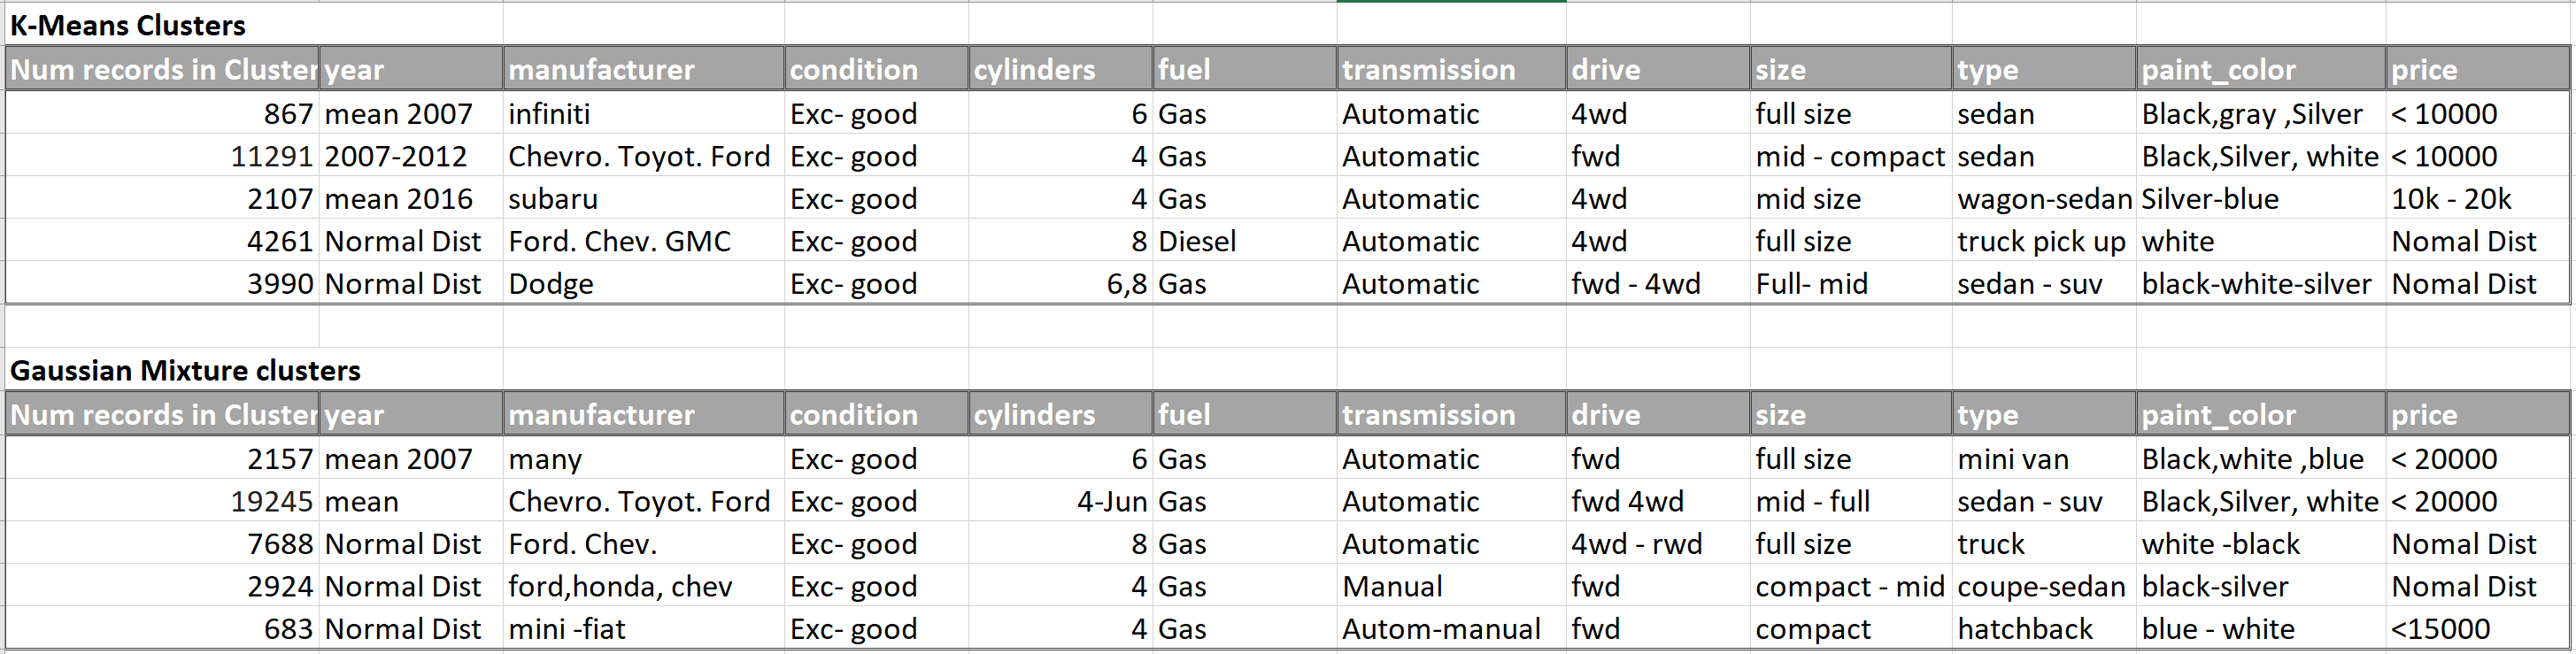

**Notas Finales**

Ambos algoritmos obtuvieron un optimo de clúster muy similar: 40 a 45

K-means converge mucho más rápido que Gaussian mixture.

Para futuros experimentos se debería probar con distintos covariance_type, aunque se hizo con el método full, otros métodos podrían mejorar el tiempo de ejecución.
